In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data=pd.read_csv('C:/Users/getsd/Desktop/DA- Portfolios/Bitcoin/bitcoin_price_Training - Training.csv')
raw_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [3]:
#check for no of rows and columns
raw_data.shape

(1556, 7)

In [4]:
#check for data types
raw_data.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [5]:
#check for basic information about the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [6]:
#changing Date column to datetime data type for better analysis
df=raw_data.copy()
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   object        
 6   Market Cap  1556 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 85.2+ KB


In [7]:
#check for first 5 rows
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [8]:
#we can see from the info function output that there is no null (na) data/missing data in our dataset
#checking for duplicate rows
df.duplicated().sum()

0

In [9]:
#descriptive analysis for the dataset
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [10]:
#feature engineering the Date column

df['Day_Name']=df['Date'].dt.day_name()
df['Month']=df['Date'].dt.month_name()
df['Year']=df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Day_Name,Month,Year
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",Monday,July,2017
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",Sunday,July,2017
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",Saturday,July,2017
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",Friday,July,2017
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",Thursday,July,2017


In [11]:
df['Day_Name'].value_counts()

Monday       223
Sunday       223
Saturday     222
Friday       222
Thursday     222
Wednesday    222
Tuesday      222
Name: Day_Name, dtype: int64

In [12]:
df['Year'].value_counts()

2016    366
2015    365
2014    365
2013    248
2017    212
Name: Year, dtype: int64

In [13]:
#sort the dataset in ascending order of date

data=df.sort_index(ascending=False).reset_index()
data.drop('index', inplace=True, axis=1)
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Day_Name,Month,Year
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",Sunday,April,2013
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",Monday,April,2013
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",Tuesday,April,2013
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",Wednesday,May,2013
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",Thursday,May,2013


In [14]:
#check the volume column
data['Volume'].value_counts()

-              243
65,203,800       1
65,783,100       1
50,582,500       1
39,657,600       1
              ... 
22,067,900       1
17,825,900       1
28,918,900       1
41,302,400       1
860,575,000      1
Name: Volume, Length: 1314, dtype: int64

In [15]:
#plotting a graph for each of the 4 columns Open, high, low, close
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap',
       'Day_Name', 'Month', 'Year'],
      dtype='object')

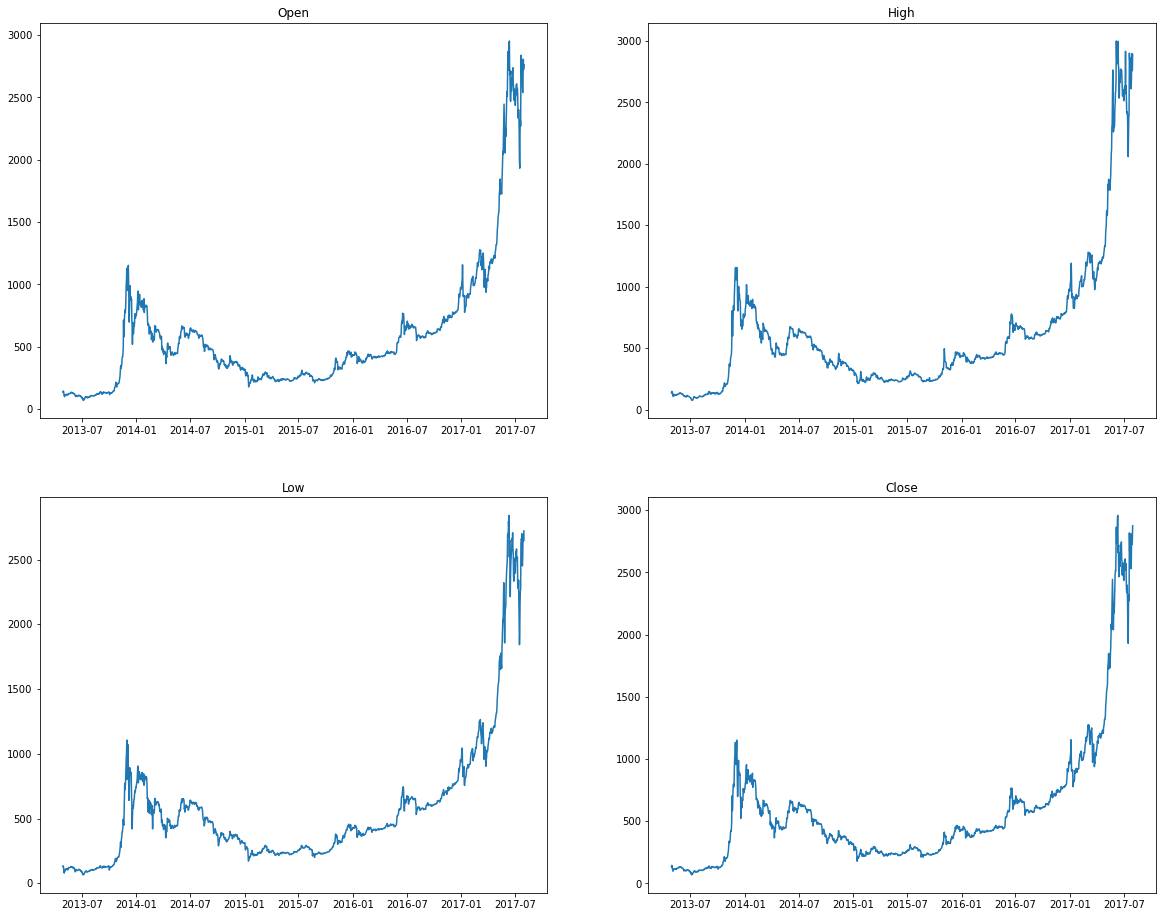

In [16]:
cols=['Open', 'High', 'Low', 'Close']
plt.figure(figsize=(20,16))
for index, col in enumerate(cols, 1):
    plt.subplot(2,2,index)
    plt.plot(data['Date'],data[col])
    plt.title(col)

In [17]:
#candle chart using plotly

bitcoin_sample=data[0:50]
bitcoin_sample.shape

(50, 10)

In [18]:
#import relevant plotly packages

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [19]:
init_notebook_mode(connected=True)

In [20]:
trace=go.Candlestick(x=bitcoin_sample['Date'],
                    low=bitcoin_sample['Low'],
                    high=bitcoin_sample['High'],
                    open=bitcoin_sample['Open'],
                    close=bitcoin_sample['Close'])
candle_data=[trace]
layout={'title':'Bitcoin Historical Price',
       'xaxis':{'title':'Date'}}

In [21]:
fig=go.Figure(data=candle_data, layout=layout)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [22]:
#Setting Date as index for better analysis
data_date=data.set_index('Date')
data_date.head()

,Open,High,Low,Close,Volume,Market Cap,Day_Name,Month,Year
Date,,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",Sunday,April,2013
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",Monday,April,2013
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",Tuesday,April,2013
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",Wednesday,May,2013
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",Thursday,May,2013


<AxesSubplot:xlabel='Date'>

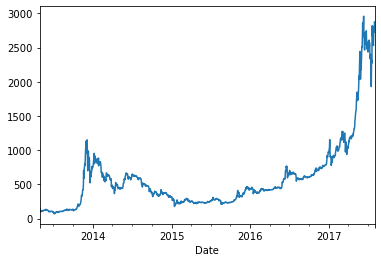

In [23]:
data_date['Close'].plot()

In [24]:
data_date['Log_Close']=np.log1p(data_date['Close'])
data_date.head()

,Open,High,Low,Close,Volume,Market Cap,Day_Name,Month,Year,Log_Close
Date,,,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",Sunday,April,2013,4.906829
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",Monday,April,2013,4.980451
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",Tuesday,April,2013,4.941642
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",Wednesday,May,2013,4.770600
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",Thursday,May,2013,4.665418


<AxesSubplot:xlabel='Date'>

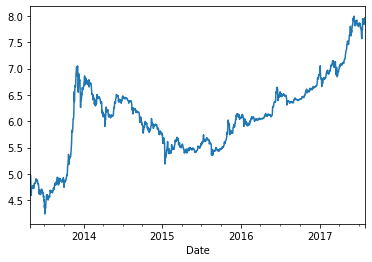

In [25]:
data_date['Log_Close'].plot()

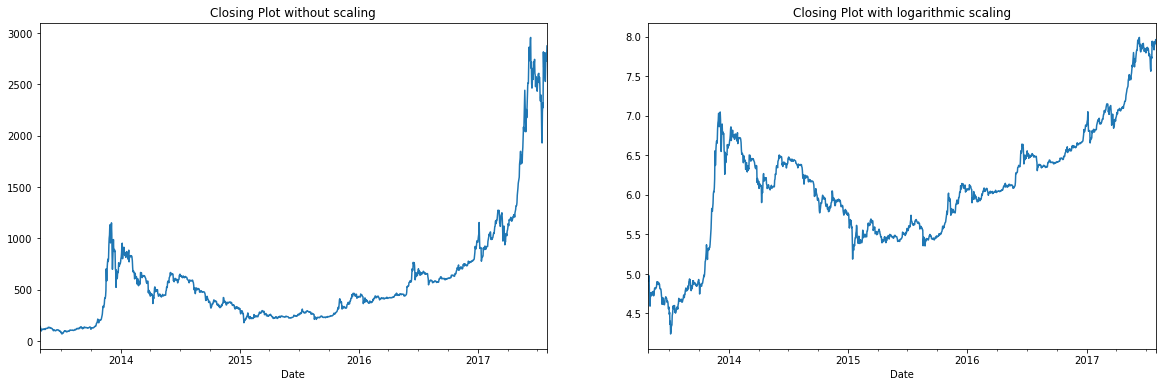

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
data_date['Close'].plot()
plt.title('Closing Plot without scaling')

plt.subplot(1,2,2)
data_date['Log_Close'].plot()
plt.title('Closing Plot with logarithmic scaling')

plt.show()

In [27]:
#resampling on a yearly basis
data_date['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

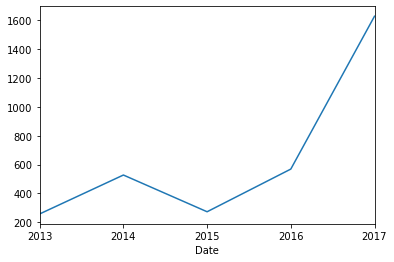

In [28]:
data_date['Close'].resample('Y').mean().plot()

<AxesSubplot:xlabel='Date'>

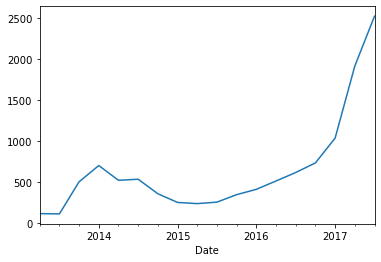

In [29]:
#resampling on a Quarterly basis
data_date['Close'].resample('Q').mean().plot()

<AxesSubplot:xlabel='Date'>

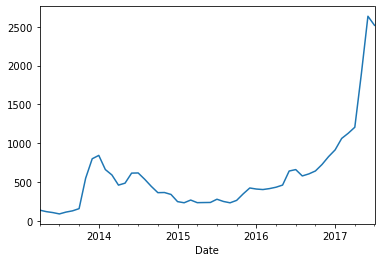

In [30]:
#resampling on a monthly basis
data_date['Close'].resample('M').mean().plot()

In [31]:
#plotting a graph of daily change %

data_date['Close']

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [32]:
#getting daily change % using inbuilt function

data_date['Close'].pct_change()

Date
2013-04-28         NaN
2013-04-29    0.076969
2013-04-30   -0.038328
2013-05-01   -0.158345
2013-05-02   -0.100692
                ...   
2017-07-27    0.056269
2017-07-28    0.051363
2017-07-29   -0.029391
2017-07-30    0.011271
2017-07-31    0.042855
Name: Close, Length: 1556, dtype: float64

<AxesSubplot:xlabel='Date'>

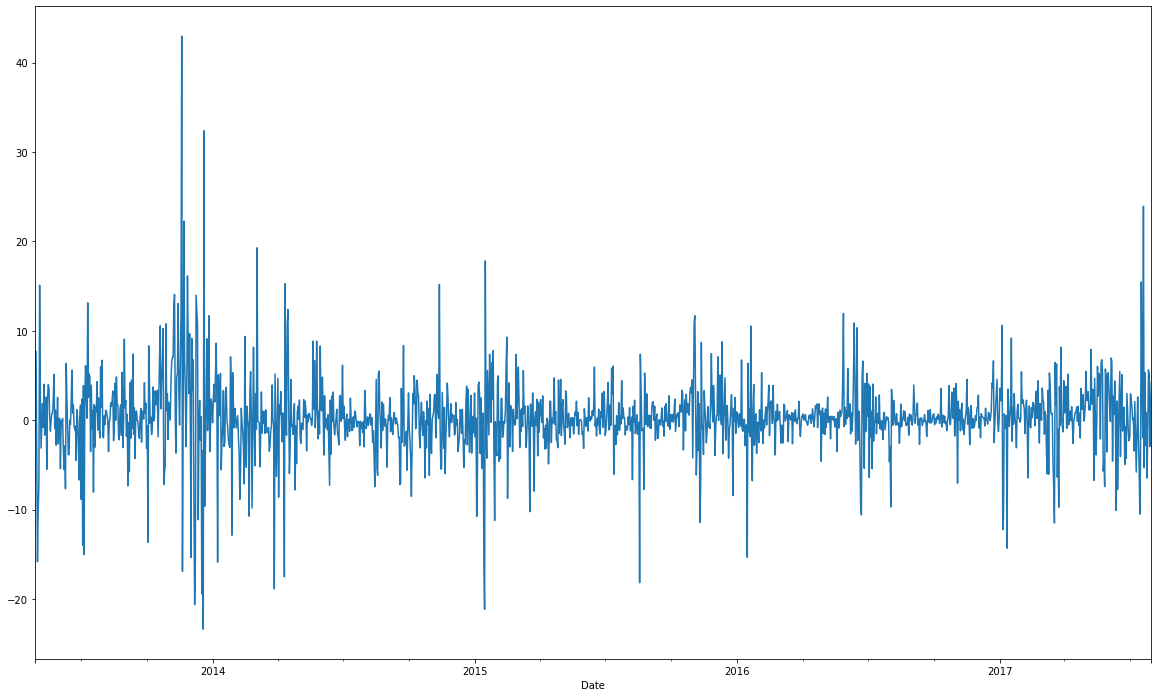

In [33]:
plt.figure(figsize=(20,12))
(data_date['Close'].pct_change()*100).plot()

In [34]:
import cufflinks as cf

In [35]:
cf.go_offline()

In [36]:
data_date['Close_pct_change']=data_date['Close'].pct_change()
data_date.head()

,Open,High,Low,Close,Volume,Market Cap,Day_Name,Month,Year,Log_Close,Close_pct_change
Date,,,,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",Sunday,April,2013,4.906829,NaN
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",Monday,April,2013,4.980451,0.076969
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",Tuesday,April,2013,4.941642,-0.038328
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",Wednesday,May,2013,4.770600,-0.158345
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",Thursday,May,2013,4.665418,-0.100692


In [37]:
data_date['Close_pct_change'].iplot()